In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Data Science Bootcamp\ML\Case Study\insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.duplicated().sum()

1

In [6]:
# Check for duplicates
duplicates = df.duplicated().sum()

# Descriptive statistics to identify any obvious inconsistencies
descriptive_stats = df.describe(include='all')

duplicates, descriptive_stats

(1,
                 age   sex          bmi     children smoker     region  \
 count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
 unique          NaN     2          NaN          NaN      2          4   
 top             NaN  male          NaN          NaN     no  southeast   
 freq            NaN   676          NaN          NaN   1064        364   
 mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
 std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
 min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
 25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
 50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
 75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
 max       64.000000   NaN    53.130000     5.000000    NaN        NaN   
 
              charges  
 count    1338.000000  
 unique           NaN  
 top              NaN  
 freq     

In [7]:
# Removing the duplicate row
data_cleaned = df.drop_duplicates()

# Converting categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data_cleaned, columns=['sex', 'smoker', 'region'])

# Display the first few rows of the encoded data
encoded_first_rows = data_encoded.head()
encoded_first_rows

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [8]:
# Re-encoding the categorical variables using one-hot encoding, ensuring the results are 0s and 1s
data_reencoded = pd.get_dummies(data_cleaned, columns=['sex', 'smoker', 'region'], drop_first=True)

# Displaying the first few rows of the re-encoded data to verify the change
reencoded_first_rows = data_reencoded.head()
reencoded_first_rows

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


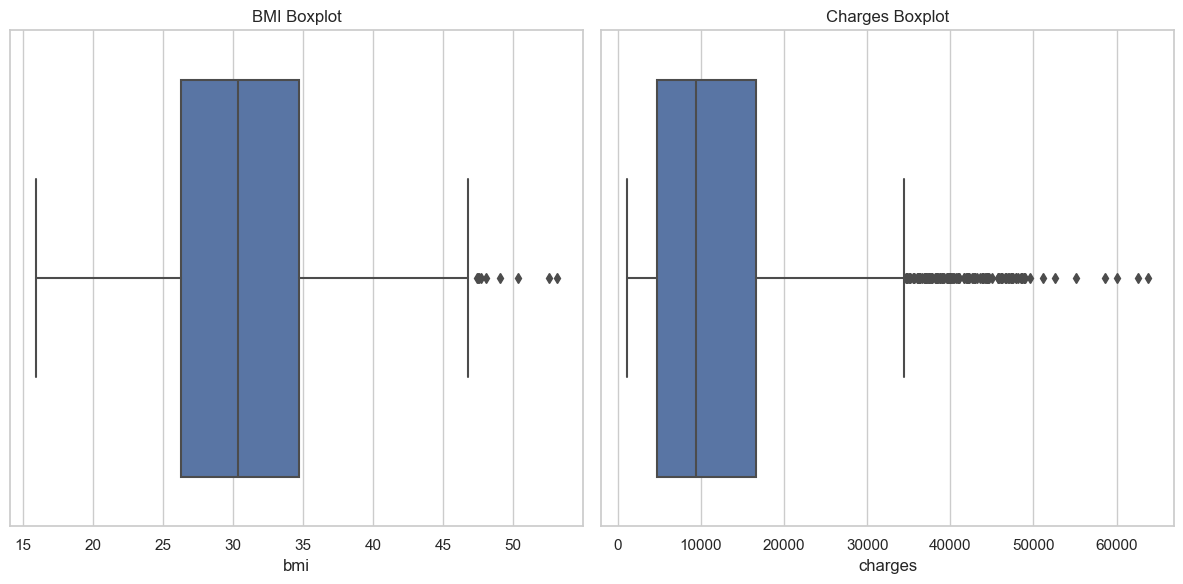

In [9]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting boxplots for 'bmi' and 'charges' to check for outliers
plt.figure(figsize=(12, 6))

# BMI Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=data_encoded, x='bmi').set_title('BMI Boxplot')

# Charges Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=data_encoded, x='charges').set_title('Charges Boxplot')

plt.tight_layout()
plt.show()

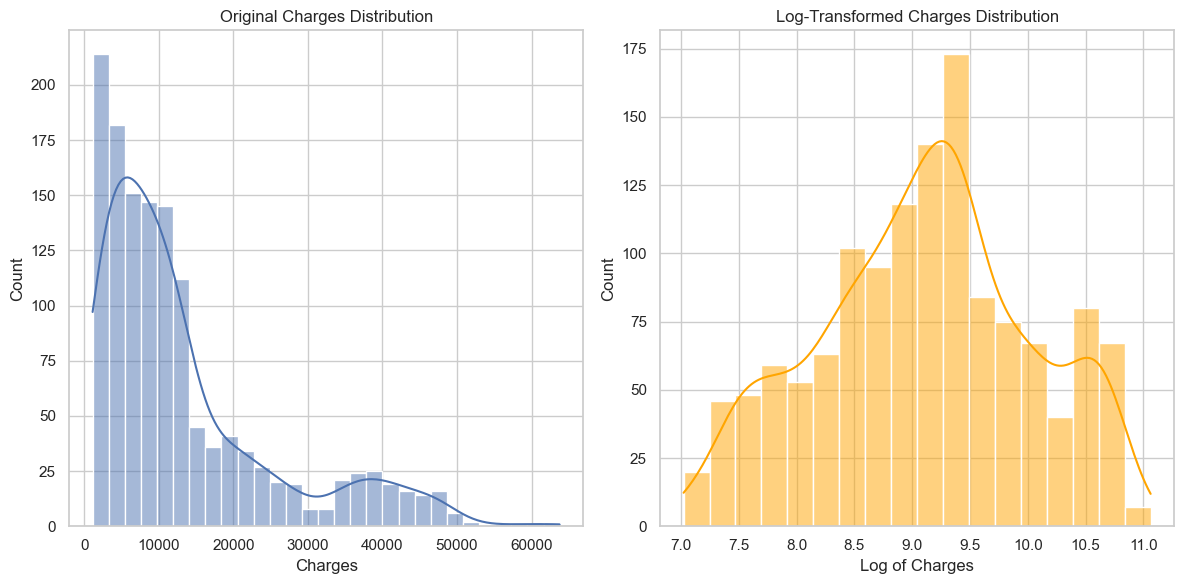

In [10]:
# Applying log transformation to the 'charges' column
data_encoded['charges_log'] = np.log(data_encoded['charges'])

# Plotting the original and log-transformed 'charges' distributions for comparison
plt.figure(figsize=(12, 6))

# Original 'charges' Distribution
plt.subplot(1, 2, 1)
sns.histplot(data_encoded['charges'], kde=True)
plt.title('Original Charges Distribution')
plt.xlabel('Charges')

# Log-Transformed 'charges' Distribution
plt.subplot(1, 2, 2)
sns.histplot(data_encoded['charges_log'], kde=True, color='orange')
plt.title('Log-Transformed Charges Distribution')
plt.xlabel('Log of Charges')

plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

# Features to be standardized
features_to_scale = ['age', 'bmi', 'children', 'charges_log']

# Creating a StandardScaler object
scaler = StandardScaler()

# Standardizing the features
data_encoded[features_to_scale] = scaler.fit_transform(data_encoded[features_to_scale])

# Displaying the first few rows of the standardized data
standardized_first_rows = data_encoded.head()
standardized_first_rows

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges_log
0,-1.440418,-0.453160,-0.909234,16884.92400,True,False,False,True,False,False,False,True,0.690636
1,-1.511647,0.509422,-0.079442,1725.55230,False,True,True,False,False,False,True,False,-1.793016
2,-0.799350,0.383155,1.580143,4449.46200,False,True,True,False,False,False,True,False,-0.761567
3,-0.443201,-1.305052,-0.909234,21984.47061,False,True,True,False,False,True,False,False,0.978014
4,-0.514431,-0.292456,-0.909234,3866.85520,False,True,True,False,False,True,False,False,-0.914386


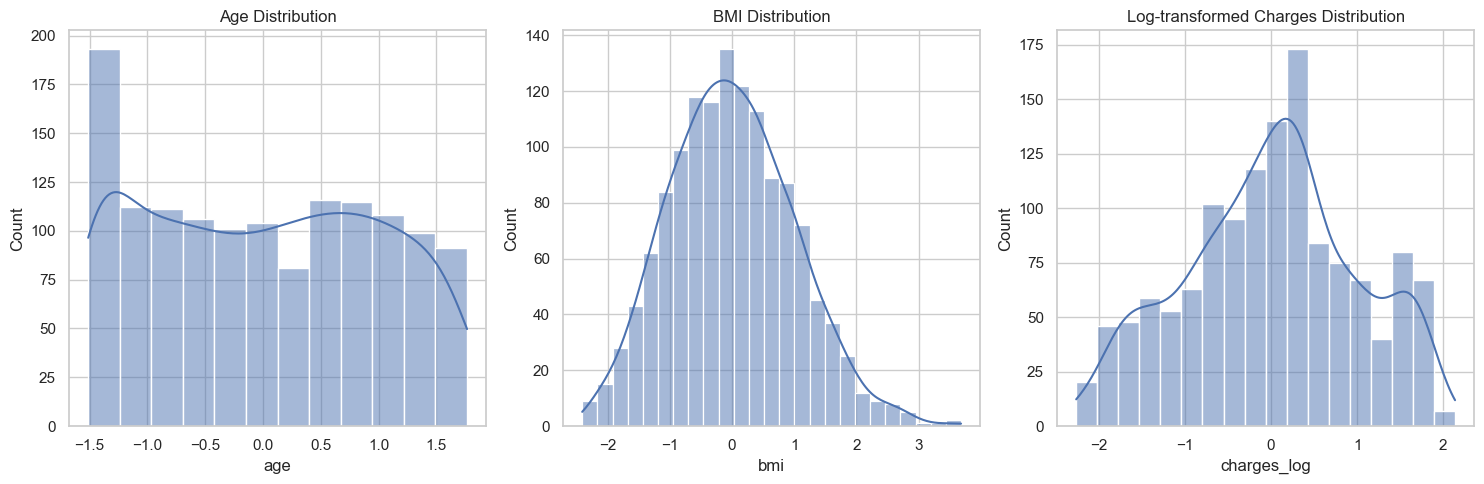

In [12]:
# Plotting the distributions of key variables: 'age', 'bmi', and 'charges_log'
plt.figure(figsize=(15, 5))

# Age Distribution
plt.subplot(1, 3, 1)
sns.histplot(data_encoded['age'], kde=True)
plt.title('Age Distribution')

# BMI Distribution
plt.subplot(1, 3, 2)
sns.histplot(data_encoded['bmi'], kde=True)
plt.title('BMI Distribution')

# Log-transformed Charges Distribution
plt.subplot(1, 3, 3)
sns.histplot(data_encoded['charges_log'], kde=True)
plt.title('Log-transformed Charges Distribution')

plt.tight_layout()
plt.show()

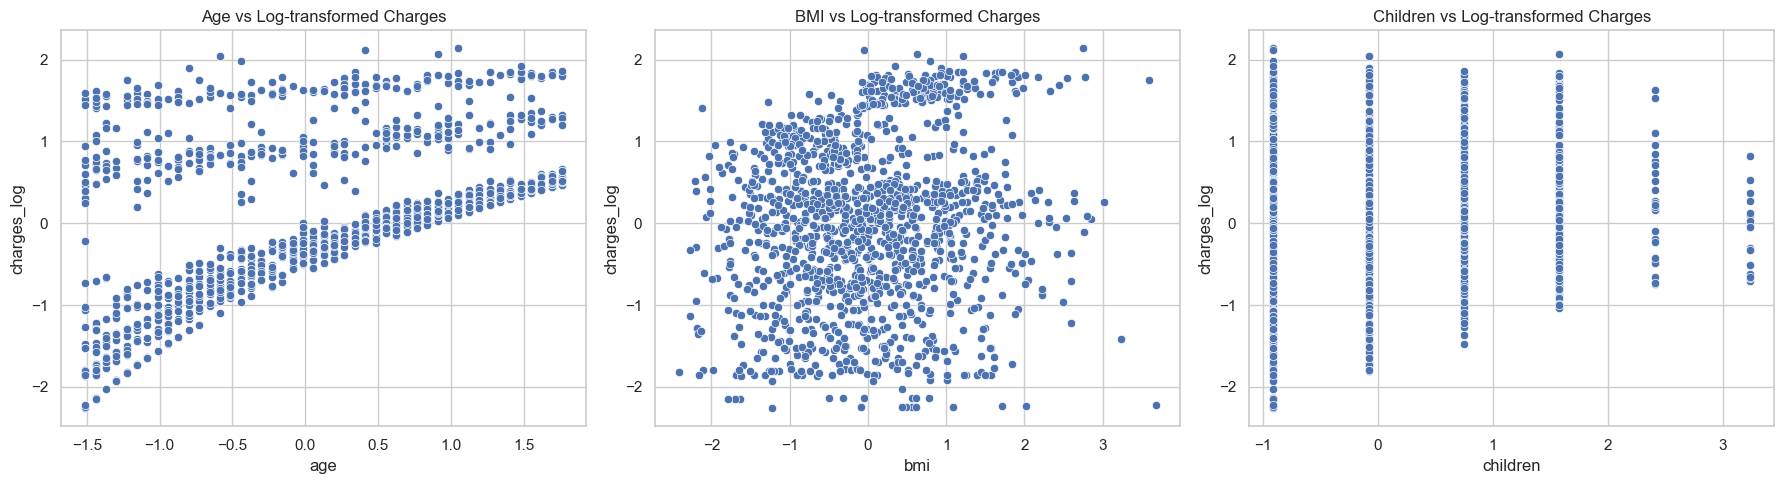

In [13]:
# Investigating relationships between features and the log-transformed target variable 'charges_log'
plt.figure(figsize=(18, 5))

# Relationship between Age and Charges
plt.subplot(1, 3, 1)
sns.scatterplot(x=data_encoded['age'], y=data_encoded['charges_log'])
plt.title('Age vs Log-transformed Charges')

# Relationship between BMI and Charges
plt.subplot(1, 3, 2)
sns.scatterplot(x=data_encoded['bmi'], y=data_encoded['charges_log'])
plt.title('BMI vs Log-transformed Charges')

# Relationship between Children and Charges
plt.subplot(1, 3, 3)
sns.scatterplot(x=data_encoded['children'], y=data_encoded['charges_log'])
plt.title('Children vs Log-transformed Charges')

plt.tight_layout()
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data_encoded' is your preprocessed DataFrame
# Define the independent variables (features)
X_numeric = data_encoded.drop(['charges', 'charges_log'], axis=1)

# Define the dependent variable (target)
y = data_encoded['charges_log']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Implementing a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = lin_reg.predict(X_test)

# Evaluating model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Outputting the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.1876836162588106
R-squared: 0.8294642959644736


In [20]:
# Retrieving the coefficients of the linear regression model
coefficients = pd.DataFrame(lin_reg.coef_, X_numeric.columns, columns=['Coefficient'])

# Intercept of the model
intercept = lin_reg.intercept_

print(coefficients)
print("\nIntercept: ", intercept)


                  Coefficient
age                  0.519715
bmi                  0.087320
children             0.130135
sex_female           0.041812
sex_male            -0.041812
smoker_no           -0.837099
smoker_yes           0.837099
region_northeast     0.074456
region_northwest     0.026917
region_southeast    -0.065575
region_southwest    -0.035798

Intercept:  0.5002091784107924


The coefficients from the linear regression model give us insights into how different features impact medical charges. Let's discuss the impact of each feature:

Age (Coefficient: 0.52):

Age is a significant predictor of medical charges. The positive coefficient suggests that as age increases, so do the medical charges, exponentially due to the log transformation. This aligns with general expectations, as older individuals often require more medical care.
BMI (Coefficient: 0.087):

A higher Body Mass Index (BMI) is associated with higher medical charges. This could be because higher BMI is often linked with various health conditions that might require medical attention.
Children (Coefficient: 0.13):

The number of children (dependents) also positively impacts medical charges. More children could mean higher medical expenses, possibly due to the need for additional medical care for the family.
Sex:

Female (Coefficient: 0.042): Being female slightly increases the charges compared to being male. This could reflect gender-specific healthcare needs.
Male (Coefficient: -0.042): Being male slightly decreases the charges compared to females, suggesting lower healthcare costs.
Smoker:

Non-Smoker (Coefficient: -0.837): Non-smokers have significantly lower charges than smokers. This substantial negative coefficient highlights the impact of smoking on healthcare costs.
Smoker (Coefficient: 0.837): Smokers have significantly higher charges, emphasizing the high cost of smoking-related health issues.
Region:

Northeast (Coefficient: 0.074): Living in the northeast slightly increases medical charges compared to other regions.
Northwest (Coefficient: 0.027): The northwest shows a smaller increase in charges.
Southeast (Coefficient: -0.066): The southeast shows a slight decrease in charges.
Southwest (Coefficient: -0.036): The southwest also indicates a decrease in charges.
These regional variations could reflect differences in healthcare costs, living standards, or prevalent health conditions in these areas.

It's important to remember that these interpretations are based on a linear regression model fitted to the dataset, assuming other factors are held constant. The actual impact of these factors on medical charges can be influenced by a variety of other variables and individual circumstances.

These insights can help healthcare providers, insurers, and policymakers understand the key drivers of healthcare costs and potentially guide decisions and policies to manage these costs effectively.